In [1]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-20 19:42.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

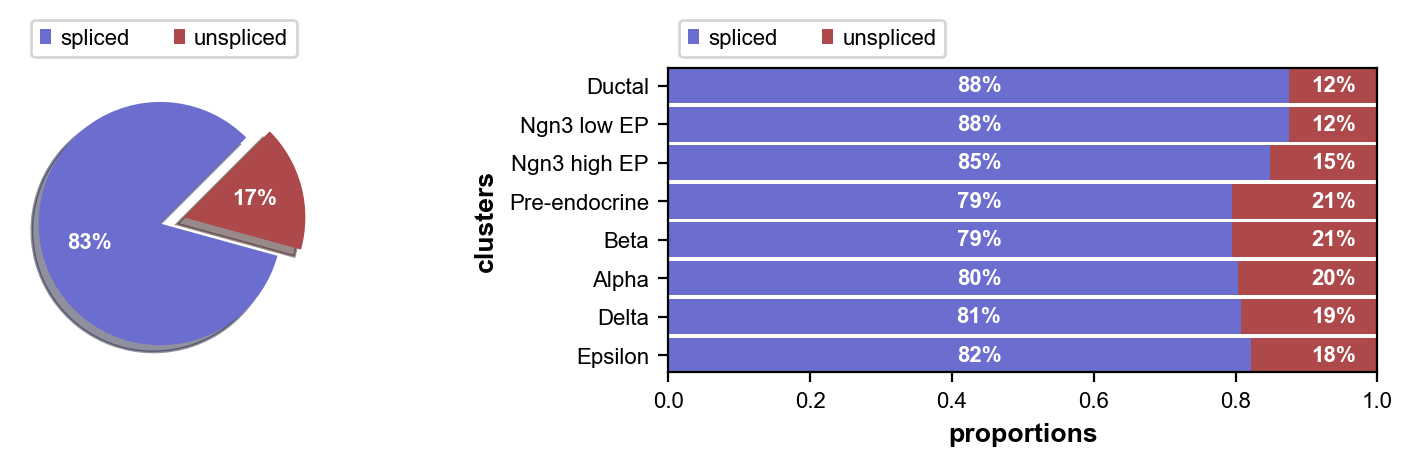

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:43) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [8]:
adata.var['velocity_gamma']

index
Sntg1      24.762068
Snhg6       0.153177
Ncoa2       3.020332
Sbspon      0.215632
Ube2w       3.243393
             ...    
Tmem27      0.009217
Uty         4.634991
Ddx3y       0.723885
Eif2s3y     0.346667
Erdr1       1.347464
Name: velocity_gamma, Length: 1945, dtype: float32

In [12]:
import pandas as pd

In [14]:
pd.DataFrame(adata.layers['velocity'])

,0,1,2,3,4,5,6,7,8,9,...,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944
0,0.045809,-0.013874,0.906566,0.000000,0.117162,-0.000303,-0.198086,0.410751,-0.094412,0.018837,...,0.145335,0.060290,-0.028292,-0.038317,-0.069495,0.004702,0.356629,0.080727,0.102456,-0.183950
1,0.058600,-0.106498,0.302645,-0.081008,0.180628,0.008252,0.110017,0.000000,0.088898,-0.033615,...,0.061064,0.000000,0.000000,-0.083959,0.000000,0.013099,0.413533,0.054413,0.047919,0.114977
2,0.058696,0.003613,-0.009070,0.000000,0.347233,0.000000,-0.054470,-0.663097,0.171124,0.145360,...,0.138409,0.046809,0.101314,-0.113471,0.050075,0.059981,0.033049,0.102039,0.026801,-0.128654
3,0.198549,-0.036056,0.434713,0.038094,0.172086,-0.031458,0.109848,0.000000,0.163963,0.027747,...,0.060526,0.044224,0.000000,-0.009959,0.000000,-0.000159,0.050653,0.207714,0.048796,-0.136330
4,0.000000,-0.009642,0.858415,-0.007877,0.134578,-0.004548,0.421422,6.523755,0.106955,0.045715,...,0.343615,-0.070510,0.000000,-0.068881,0.000000,0.000000,-0.123818,0.312635,0.025256,-0.478304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,0.079814,-0.022929,-0.281304,0.023124,0.297232,-0.001885,-0.099180,-1.732272,-0.053912,0.042693,...,0.260732,-0.011992,0.009625,-0.015344,-0.026185,0.022169,0.195483,0.040074,0.072391,-0.219626
3692,0.192745,-0.082086,0.192292,-0.003563,-0.047761,-0.015640,0.750780,3.897942,0.071718,0.330378,...,0.279091,0.571227,-0.005249,-0.040648,0.046746,-0.000235,-0.113618,0.001998,-0.018233,-0.072610
3693,0.029476,-0.110303,0.419629,0.064663,0.027133,-0.009191,0.368509,0.000000,-0.003852,-0.189546,...,-0.107653,0.000000,0.000000,0.147062,0.000000,-0.000218,0.069278,-0.000702,0.036405,0.079089
3694,0.165575,-0.031810,0.262943,0.000000,0.122204,0.013240,0.246075,0.677578,-0.179644,-0.002723,...,0.197631,0.016508,0.032059,-0.140831,0.201702,0.101726,-0.067754,-0.164266,0.102093,-0.284267


In [10]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [11]:
Unspliced - adata.var['velocity_gamma']*Spliced

index,Sntg1,Snhg6,Ncoa2,Sbspon,Ube2w,Mcm3,Fam135a,Adgrb3,Tmem131,Tbc1d8,...,Sh3kbp1,Map3k15,Rai2,Rbbp7,Ap1s2,Tmem27,Uty,Ddx3y,Eif2s3y,Erdr1
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGGGATA,0.045809,-0.013874,0.906566,0.000000,0.117162,-0.000303,-0.198086,0.410751,-0.094412,0.018837,...,0.145335,0.060290,-0.028292,-0.038317,-0.069495,0.004702,0.356629,0.080727,0.102456,-0.183950
AAACCTGAGCCTTGAT,0.058600,-0.106498,0.302645,-0.081008,0.180628,0.008252,0.110017,0.000000,0.088898,-0.033615,...,0.061064,0.000000,0.000000,-0.083959,0.000000,0.013099,0.413533,0.054413,0.047919,0.114977
AAACCTGAGGCAATTA,0.058696,0.003613,-0.009070,0.000000,0.347233,0.000000,-0.054470,-0.663097,0.171124,0.145360,...,0.138409,0.046809,0.101314,-0.113471,0.050075,0.059981,0.033049,0.102039,0.026801,-0.128654
AAACCTGCATCATCCC,0.198549,-0.036056,0.434713,0.038094,0.172086,-0.031458,0.109848,0.000000,0.163963,0.027747,...,0.060526,0.044224,0.000000,-0.009959,0.000000,-0.000159,0.050653,0.207714,0.048796,-0.136330
AAACCTGGTAAGTGGC,0.000000,-0.009642,0.858415,-0.007877,0.134578,-0.004548,0.421422,6.523755,0.106955,0.045715,...,0.343615,-0.070510,0.000000,-0.068881,0.000000,0.000000,-0.123818,0.312635,0.025256,-0.478304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGACATA,0.079814,-0.022929,-0.281304,0.023124,0.297232,-0.001885,-0.099180,-1.732272,-0.053912,0.042693,...,0.260732,-0.011992,0.009625,-0.015344,-0.026185,0.022169,0.195483,0.040074,0.072391,-0.219626
TTTGTCAAGTGTGGCA,0.192745,-0.082086,0.192292,-0.003563,-0.047761,-0.015640,0.750780,3.897942,0.071718,0.330378,...,0.279091,0.571227,-0.005249,-0.040648,0.046746,-0.000235,-0.113618,0.001998,-0.018233,-0.072610
TTTGTCAGTTGTTTGG,0.029476,-0.110303,0.419629,0.064663,0.027133,-0.009191,0.368509,0.000000,-0.003852,-0.189546,...,-0.107653,0.000000,0.000000,0.147062,0.000000,-0.000218,0.069278,-0.000702,0.036405,0.079089


In [15]:
from explinear import ExpLinearRegression

In [16]:
llr = ExpLinearRegression()

In [17]:
llr.fit(Spliced, Unspliced)

In [18]:
import numpy as np

In [23]:
gamma = llr.coef_
gamma

array([2.0459547 , 0.60096776, 1.7167451 , ..., 1.0222517 , 0.88719803,
       1.0435714 ], dtype=float32)

In [25]:
velo = Unspliced - gamma*Spliced
velo

index,Sntg1,Snhg6,Ncoa2,Sbspon,Ube2w,Mcm3,Fam135a,Adgrb3,Tmem131,Tbc1d8,...,Sh3kbp1,Map3k15,Rai2,Rbbp7,Ap1s2,Tmem27,Uty,Ddx3y,Eif2s3y,Erdr1
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGGGATA,0.045809,-0.152867,1.003559,0.000000,0.225251,-0.006047,-0.128732,0.356213,-0.072106,0.085766,...,0.141214,0.016399,-0.361216,-0.022511,-0.177041,1.702439e-02,0.356629,-0.022042,-0.115998,-0.093368
AAACCTGAGCCTTGAT,0.058600,-0.528031,0.408341,-0.457005,0.180628,-0.249072,0.135977,0.000000,0.098478,0.015164,...,0.060566,0.000000,0.000000,-0.043939,0.000000,1.368443e-02,0.481579,-0.032501,-0.146346,0.198544
AAACCTGAGGCAATTA,0.058696,-0.068869,0.211227,0.000000,0.347233,0.000000,-0.012697,-0.819159,0.181468,0.145360,...,0.133463,0.019567,-0.129755,-0.089611,-0.036894,1.507339e-01,0.033049,0.068826,-0.012309,-0.029547
AAACCTGCATCATCCC,0.198549,-0.393482,0.512952,-0.190548,0.172086,-0.626751,0.126960,0.000000,0.166614,0.027747,...,0.058246,0.044224,0.000000,0.042094,0.000000,-1.064819e-11,0.050653,0.184848,-0.022249,0.107661
AAACCTGGTAAGTGGC,0.000000,-0.212467,0.908665,-0.030216,0.134578,-0.090609,0.488606,6.405124,0.113227,0.234733,...,0.337233,-0.365621,0.000000,-0.056688,0.000000,0.000000e+00,0.004010,0.272362,-0.124132,-0.350199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGACATA,0.079814,-0.208364,0.151164,0.023124,0.297232,-0.037551,-0.020107,-2.149720,-0.040126,0.102429,...,0.253457,-0.108672,-0.064297,-0.001576,-0.084511,2.745869e-02,0.195483,-0.075855,0.003099,-0.066096
TTTGTCAAGTGTGGCA,0.192745,-0.393030,0.261243,-0.013667,0.077531,-0.311602,0.804044,3.805314,0.083189,0.514765,...,0.276014,0.428973,-0.016721,-0.022106,0.041026,-1.570682e-11,-0.029200,-0.063892,-0.083913,0.088986
TTTGTCAGTTGTTTGG,0.029476,-0.432760,0.544950,-0.171909,0.080246,-0.183123,0.379741,0.000000,0.005362,-0.080205,...,-0.111853,0.000000,0.000000,0.186666,0.000000,-1.459338e-11,0.069278,-0.015214,0.002078,0.202491


In [26]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [27]:
adata.layers['velocity'] = velo

In [28]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [29]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


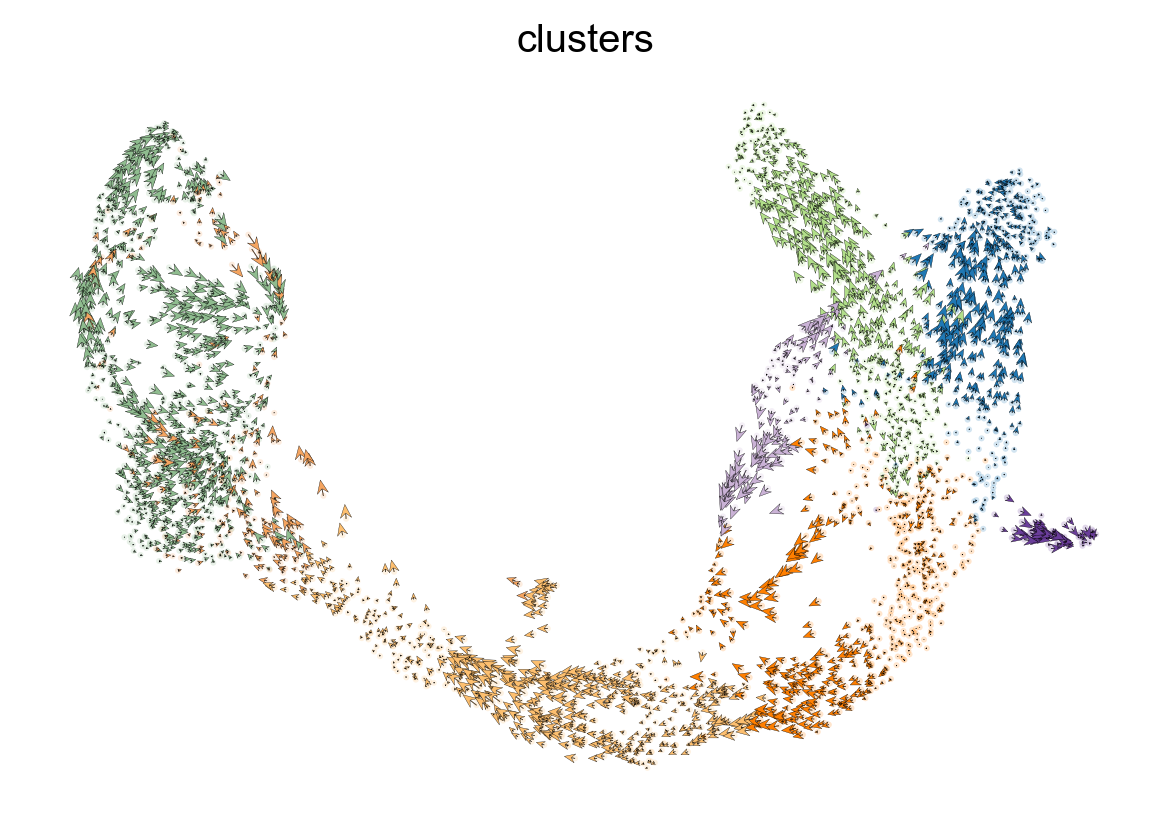

In [30]:
scv.pl.velocity_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

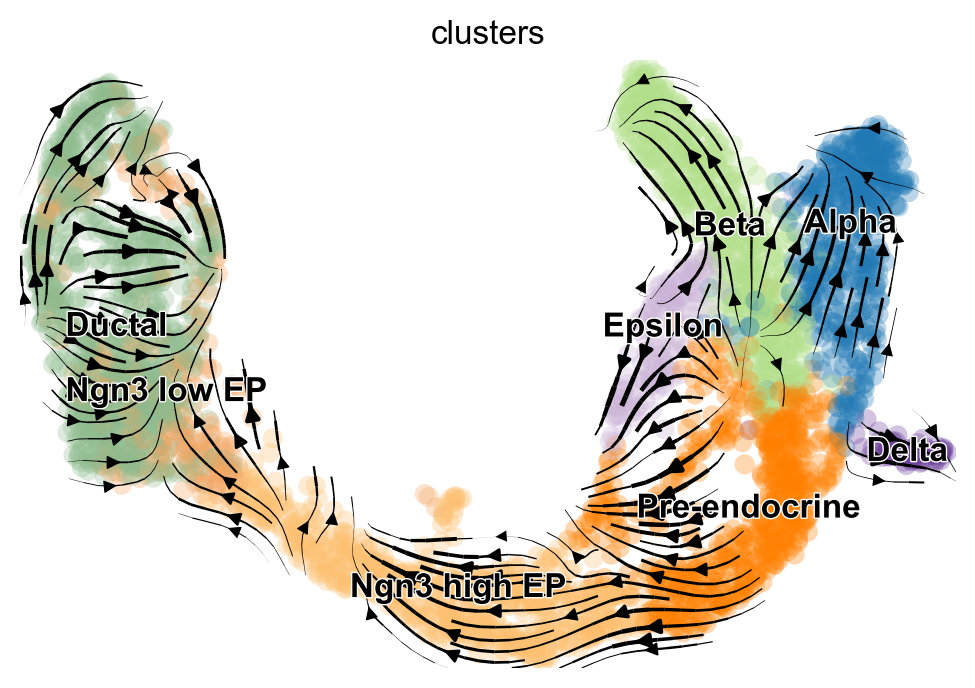

In [31]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [25]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


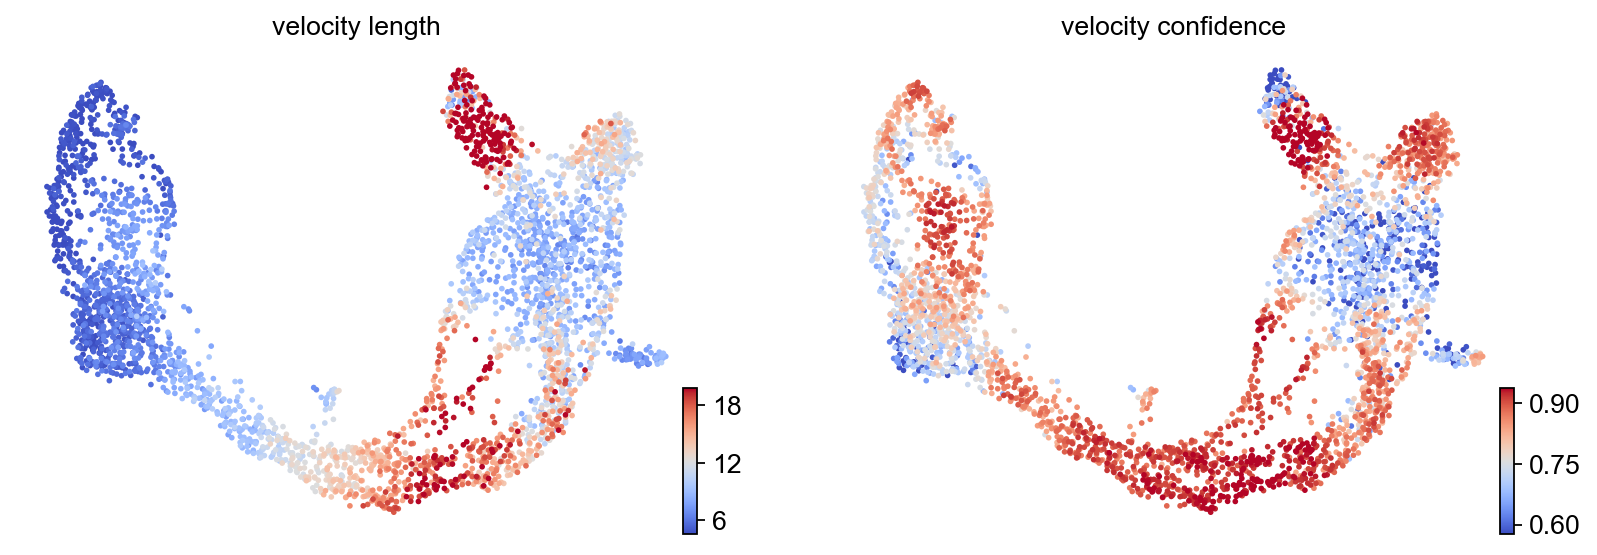

In [12]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])